In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
import mglearn

In [2]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
from sklearn.datasets import load_boston
boston=load_boston()

In [4]:
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

In [6]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [7]:
print('테스트 세트 예측; {}'.format(clf.predict(X_test)))

테스트 세트 예측; [1 0 1 0 1 0 0]


In [8]:
print('테스트 세트 정확도: {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46020 missing from current fon

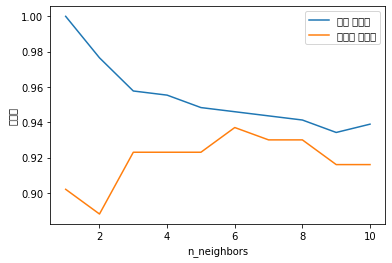

In [9]:
#k-NN, k-최근접 이웃 모델
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]

neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()

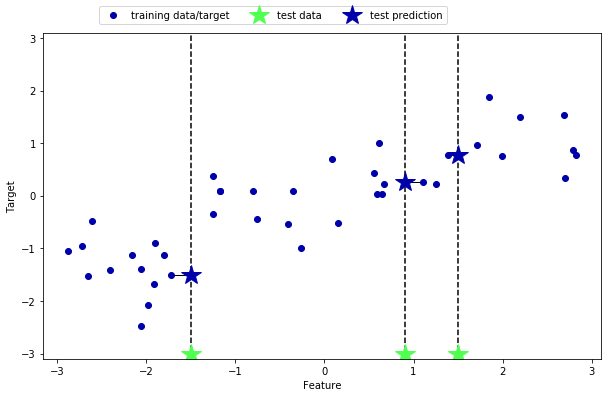

In [10]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [14]:
from sklearn.neighbors import KNeighborsRegressor

X,y=mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

reg=KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

print('테스트 세트 예측:\n{}'.format(reg.predict(X_test)))

print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.83


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current

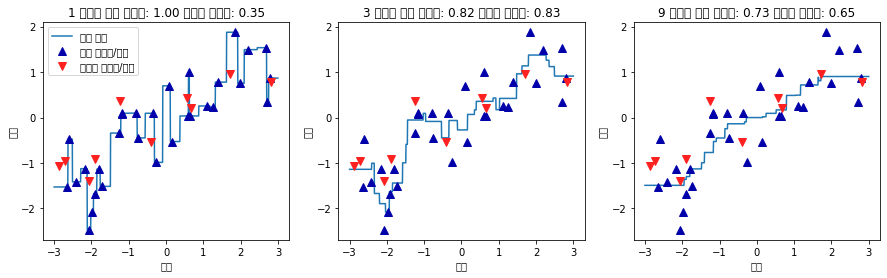

In [20]:
fig, axes=plt.subplots(1,3,figsize=(15,4))

line=np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title('{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}'.format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('특성')
    ax.set_ylabel('타깃')
axes[0].legend(['모델 예측', '훈련 데이터/타깃', '테스트 데이터/타깃'], loc='best')

w[0]: 0.393906  b: -0.031804


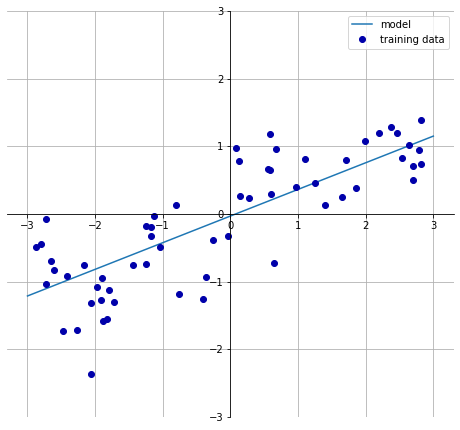

In [21]:
#선형 모델
mglearn.plots.plot_linear_regression_wave()

In [23]:
from sklearn.linear_model import LinearRegression
X,y=mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)

lr=LinearRegression().fit(X_train, y_train)

In [26]:
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_ : {}'.format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_ : -0.03180434302675973


In [27]:
#과소적합
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.6700890315075756
0.6593368596863701


In [28]:
X,y=mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)
lr=LinearRegression().fit(X_train, y_train)

In [29]:
#과대적합
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9520519609032729
0.6074721959665842


In [31]:
from sklearn.linear_model import Ridge

ridge=Ridge().fit(X_train, y_train)

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.885796658517094
0.7527683481744752


In [32]:
#높은 alpha 값은 제약이 더 많은 모델이므로 작은 alpha 값일 때보다 coef_의 절댓값이 작을 것이다.
ridge10=Ridge(alpha=10).fit(X_train, y_train)
ridge01=Ridge(alpha=0.1).fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49688 missing from current f

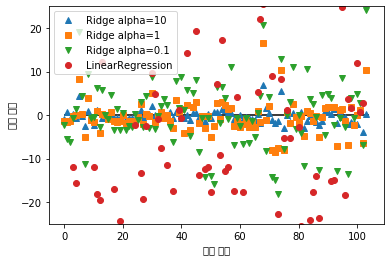

In [33]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o',label='LinearRegression')
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

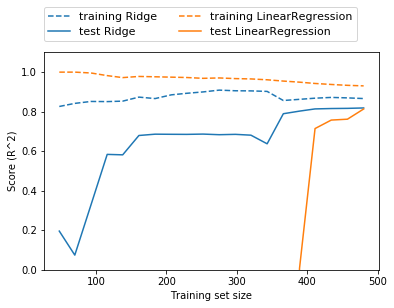

In [34]:
mglearn.plots.plot_ridge_n_samples()